In [1]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [2]:
df=pd.read_csv('Training Dataset.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df['Married']=df['Married'].fillna("Yes")

In [5]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [6]:
df['Gender']=df['Gender'].fillna("Male")

In [7]:
df['Dependents']=df['Dependents'].replace('3+',3)

In [8]:
df.drop(columns=['Loan_ID'])

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [9]:
df['Loan_Status'] = label_encoder.fit_transform(df['Loan_Status'])
df['Property_Area'] = label_encoder.fit_transform(df['Property_Area'])
df['Self_Employed'] = label_encoder.fit_transform(df['Self_Employed'])
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Married'] = label_encoder.fit_transform(df['Married'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])


In [10]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.817590,0.653094,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.037459,0.687296
std,0.386497,0.476373,0.413389,0.534737,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,2.000000,1.000000


In [11]:
df[df['Loan_Amount_Term'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,1,1,0,0,2,2600,3500.0,115.0,NaN,1.0,2,1
36,LP001109,1,1,0,0,0,1828,1330.0,100.0,NaN,0.0,2,0
44,LP001136,1,1,0,1,1,4695,0.0,96.0,NaN,1.0,2,1
45,LP001137,0,0,0,0,0,3410,0.0,88.0,NaN,1.0,2,1
73,LP001250,1,1,3,1,0,4755,0.0,95.0,NaN,0.0,1,0
112,LP001391,1,1,0,1,0,3572,4114.0,152.0,NaN,0.0,0,0
165,LP001574,1,1,0,0,0,3707,3166.0,182.0,NaN,1.0,0,1
197,LP001669,0,0,0,1,0,1907,2365.0,120.0,NaN,1.0,2,1
223,LP001749,1,1,0,0,0,7578,1010.0,175.0,NaN,1.0,1,1
232,LP001770,1,0,0,1,0,3189,2598.0,120.0,NaN,1.0,0,1


In [12]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [13]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(360)

In [14]:
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [15]:
df['Dependents'].isnull().sum()

15

In [16]:
df['Dependents'].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [17]:
df['Dependents']=df['Dependents'].fillna('0')

In [18]:
df['Dependents'].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [19]:
df['Dependents']=df['Dependents'].replace('0',0)
df['Dependents']=df['Dependents'].replace('1',1)
df['Dependents']=df['Dependents'].replace('2',2)
df['Dependents']=df['Dependents'].replace('3',3)

In [20]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,614.000000,564.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.410423,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.534737,6109.041673,2926.248369,85.587325,64.428629,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,168.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [21]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [22]:
df['LoanAmount']=df['LoanAmount'].fillna(120)

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df['Credit_History']=df['Credit_History'].fillna(1)

In [25]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

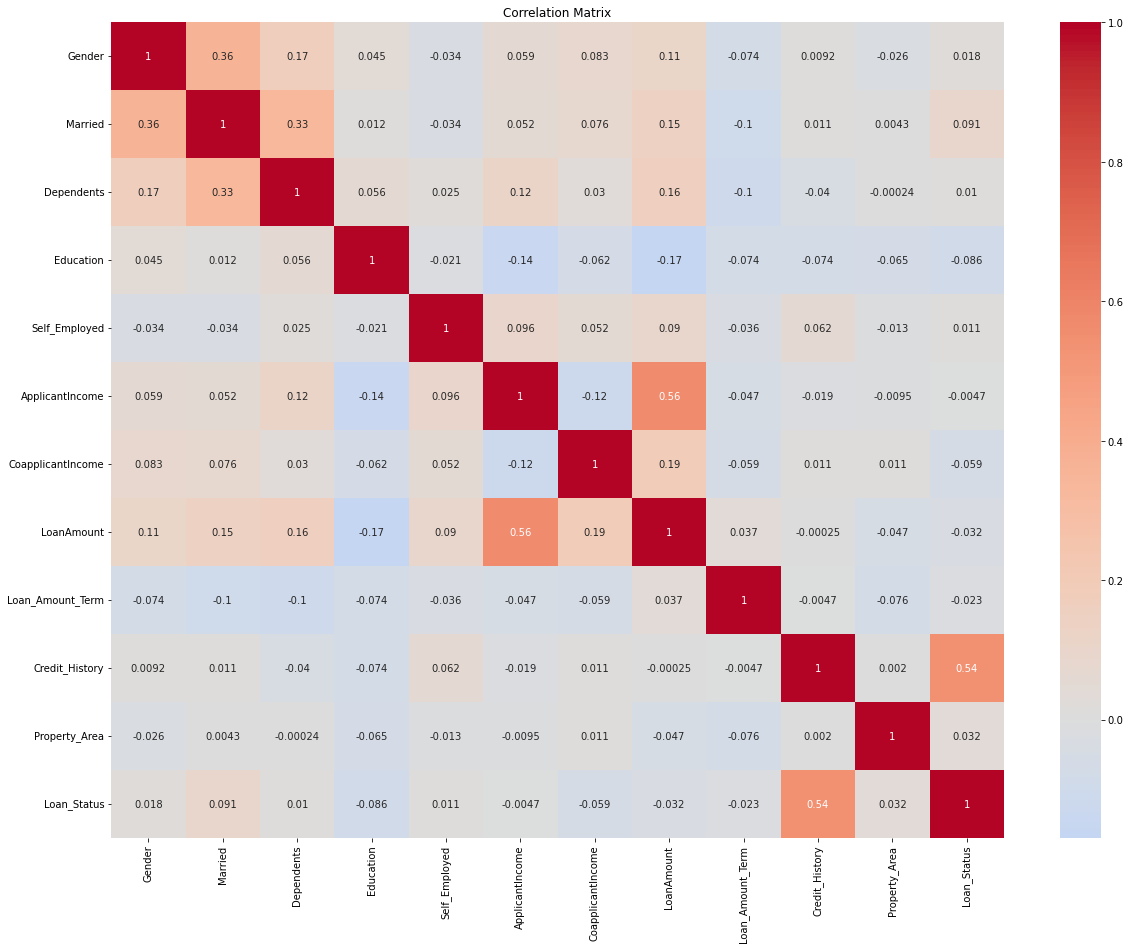

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize=(20, 15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
plt.savefig('heatmap.png', format='png')